In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.units as units
import matplotlib.ticker as ticker
import random
import time                   # To time processes
import warnings               # To suppress warnings
import itertools
import datetime
import tensorflow as tf
import csv
import math
import calendar

from random import shuffle
from pandas import read_csv
from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from numpy import array
from numpy import argmax
from scipy import stats
from datetime import datetime
from IPython.display import Image
from prettytable import PrettyTable

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve

from sklearn.utils import class_weight
from sklearn.utils.fixes import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from matplotlib.pyplot import *
import matplotlib.pyplot as plotter


warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
df=read_csv("matches.csv")

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,VK Sharma,S Ravi,NaN


In [4]:
df['result'].value_counts()

normal       686
tie            7
no result      3
Name: result, dtype: int64

<br><h1 align=center><font color=deeppink>Best Defending Team<br></font></h1>

In [5]:
#Best Defending Team

temp=df.loc[df['win_by_runs'] != 0]

In [6]:
temp['winner'].value_counts()

Mumbai Indians                 51
Chennai Super Kings            49
Kings XI Punjab                35
Kolkata Knight Riders          34
Royal Challengers Bangalore    32
Sunrisers Hyderabad            28
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64


For a maximum of 51 times, Mumbai Indians has defended their score


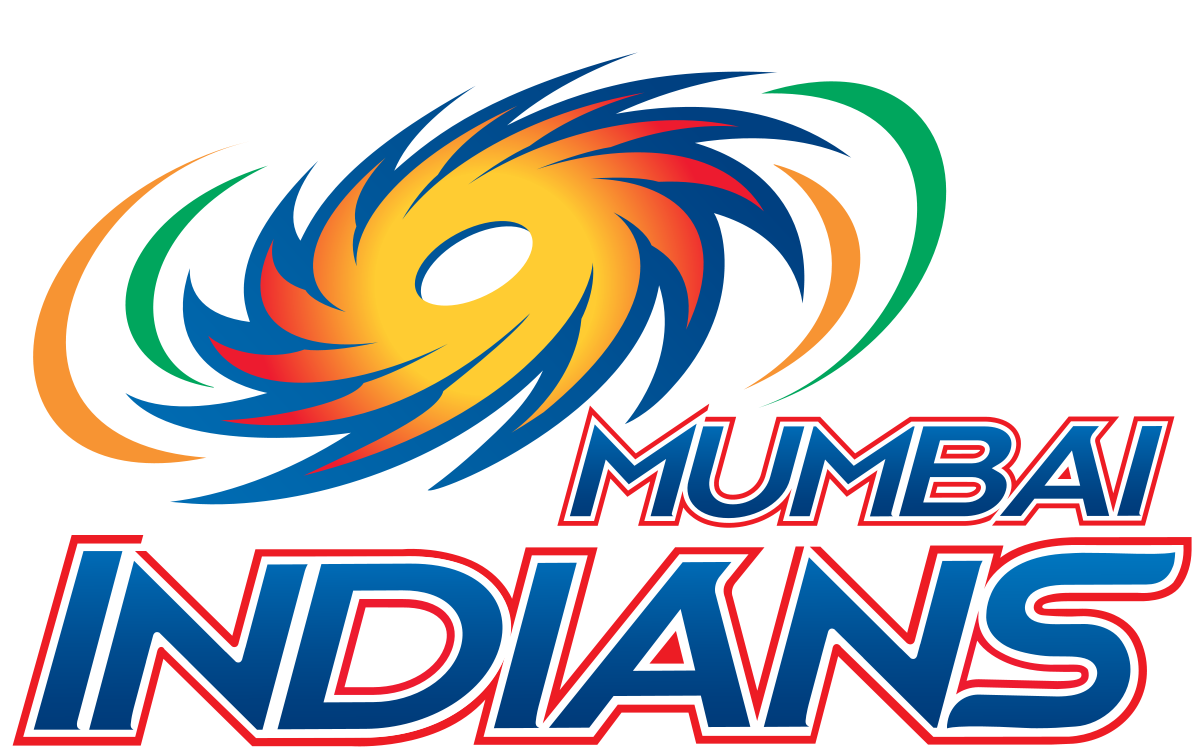

In [7]:
print("\nFor a maximum of "+ str(temp['winner'].value_counts()[0]) + " times, " + temp['winner'].value_counts().index[0] + " has defended their score")

Image("MI.png", width=500, height=500)

<br><h1 align=center><font color=deeppink>Best Chasing Team<br></font></h1>

In [8]:
#Best chasing team

temp1=df.loc[df['win_by_wickets'] != 0]

In [9]:
temp1['winner'].value_counts()

Kolkata Knight Riders          52
Royal Challengers Bangalore    46
Mumbai Indians                 46
Delhi Daredevils               42
Chennai Super Kings            41
Rajasthan Royals               41
Kings XI Punjab                39
Sunrisers Hyderabad            23
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64


For a maximum of 52 times, Kolkata Knight Riders has chased the totals successfully


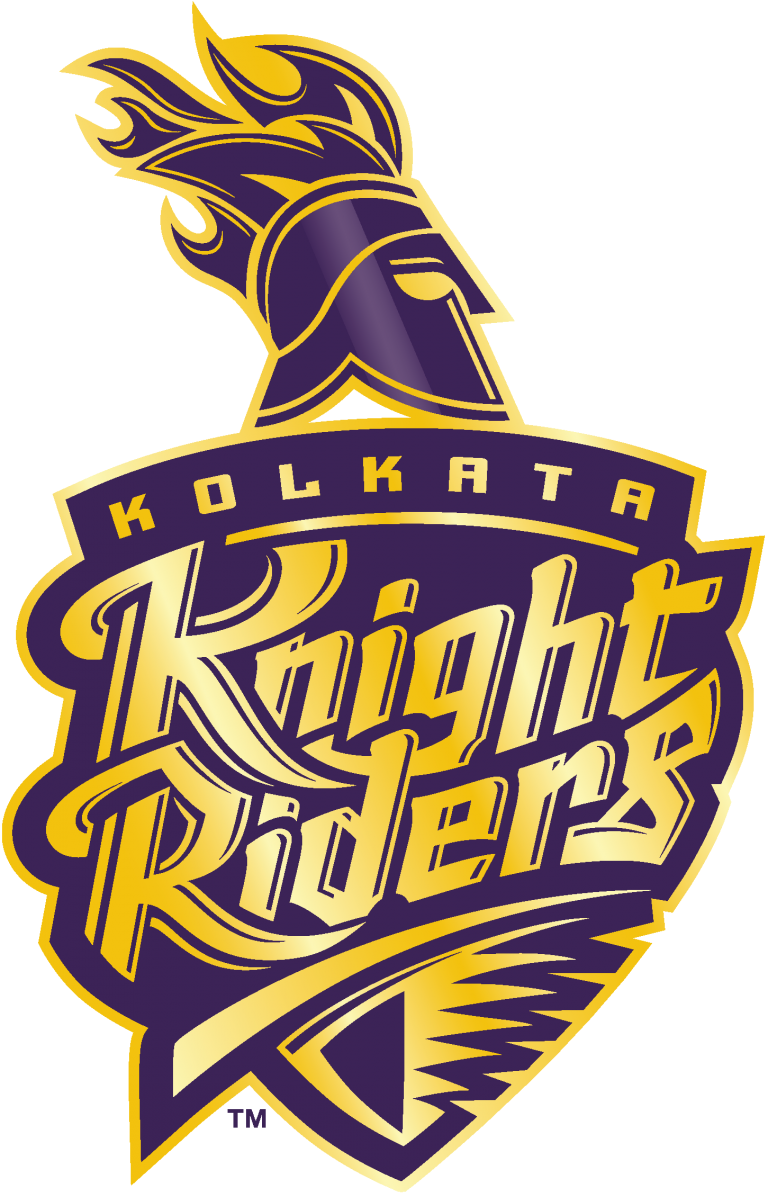

In [10]:
print("\nFor a maximum of "+ str(temp1['winner'].value_counts()[0]) + " times, " + temp1['winner'].value_counts().index[0] + " has chased the totals successfully")

Image("KKR.png", width=400, height=400)

In [11]:
df1=df.dropna(subset=['winner'])

<br><h1 align=center><font color=deeppink>Number of matches played by each team</font></h1><br>

In [12]:
#Number of matches played by each team

temp=pd.melt(df1, value_vars=['team1', 'team2'])

In [13]:
temp_series=temp['value'].value_counts()

team_names=temp_series.index.tolist()
no_of_matches=temp_series.tolist()

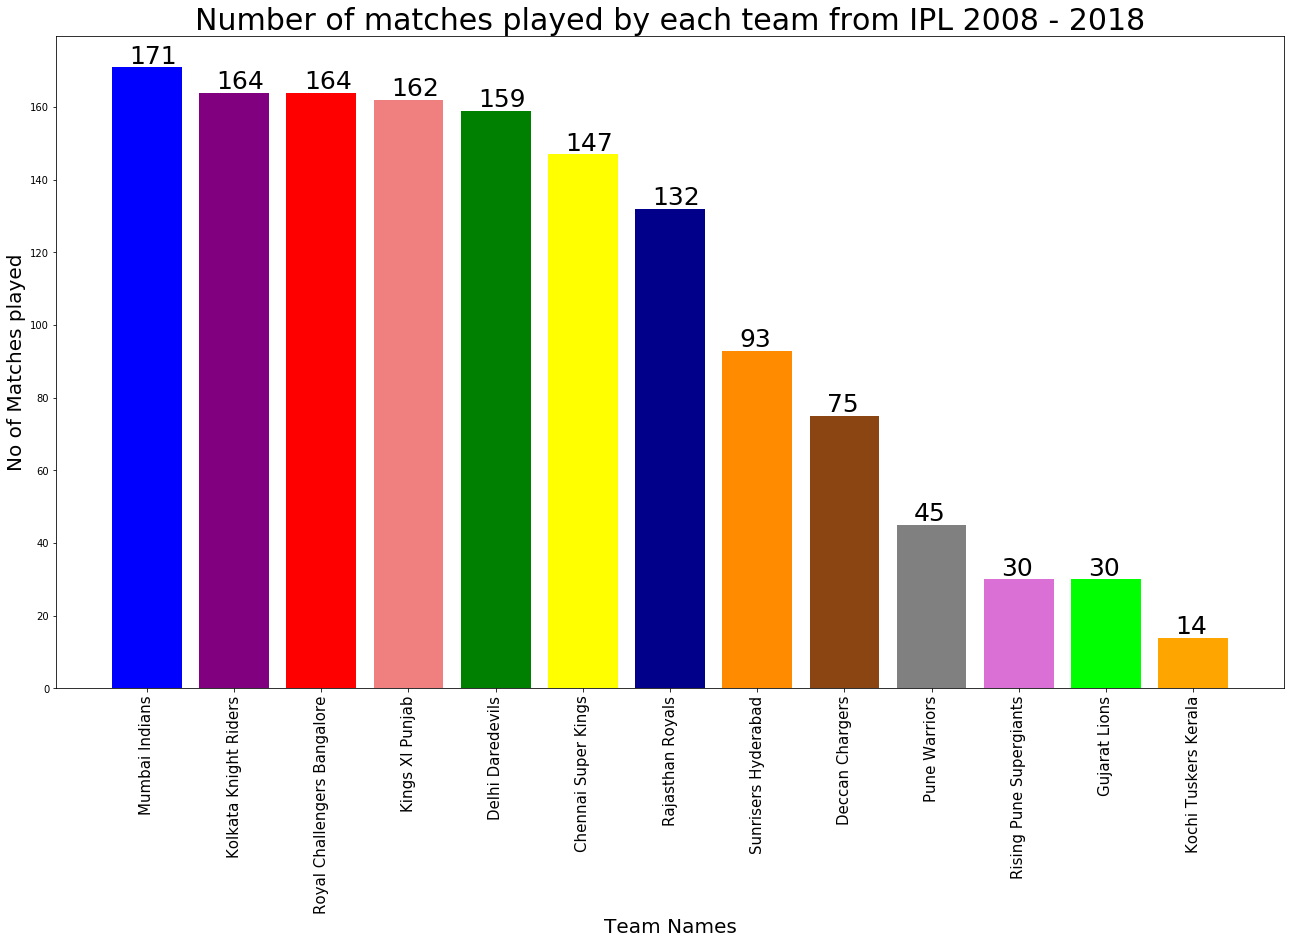

In [14]:
plt.figure(figsize=(22,12))
index = np.arange(len(temp_series.index))
bars=plt.bar(index, no_of_matches, color=['blue', 'purple', 'red', 'lightcoral', 'green', 'yellow', 'darkblue', 'darkorange', 'saddlebrown', 'gray', 'orchid', 'lime', 'orange'])
plt.xlabel('Team Names', fontsize=20)
plt.ylabel('No of Matches played', fontsize=20)
plt.xticks(index, team_names, fontsize=15, rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2, yval +1, yval, fontsize=25)
    
plt.title('Number of matches played by each team from IPL 2008 - 2018', fontsize=30)
plt.show()

<br><h1 align=center><font color=deeppink>Number of matches won by each team</font></h1><br>

In [15]:
#Number of matches won by each team

temp_series2=df1['winner'].value_counts()

team_names=temp_series2.index.tolist()
no_of_matches=temp_series2.tolist()

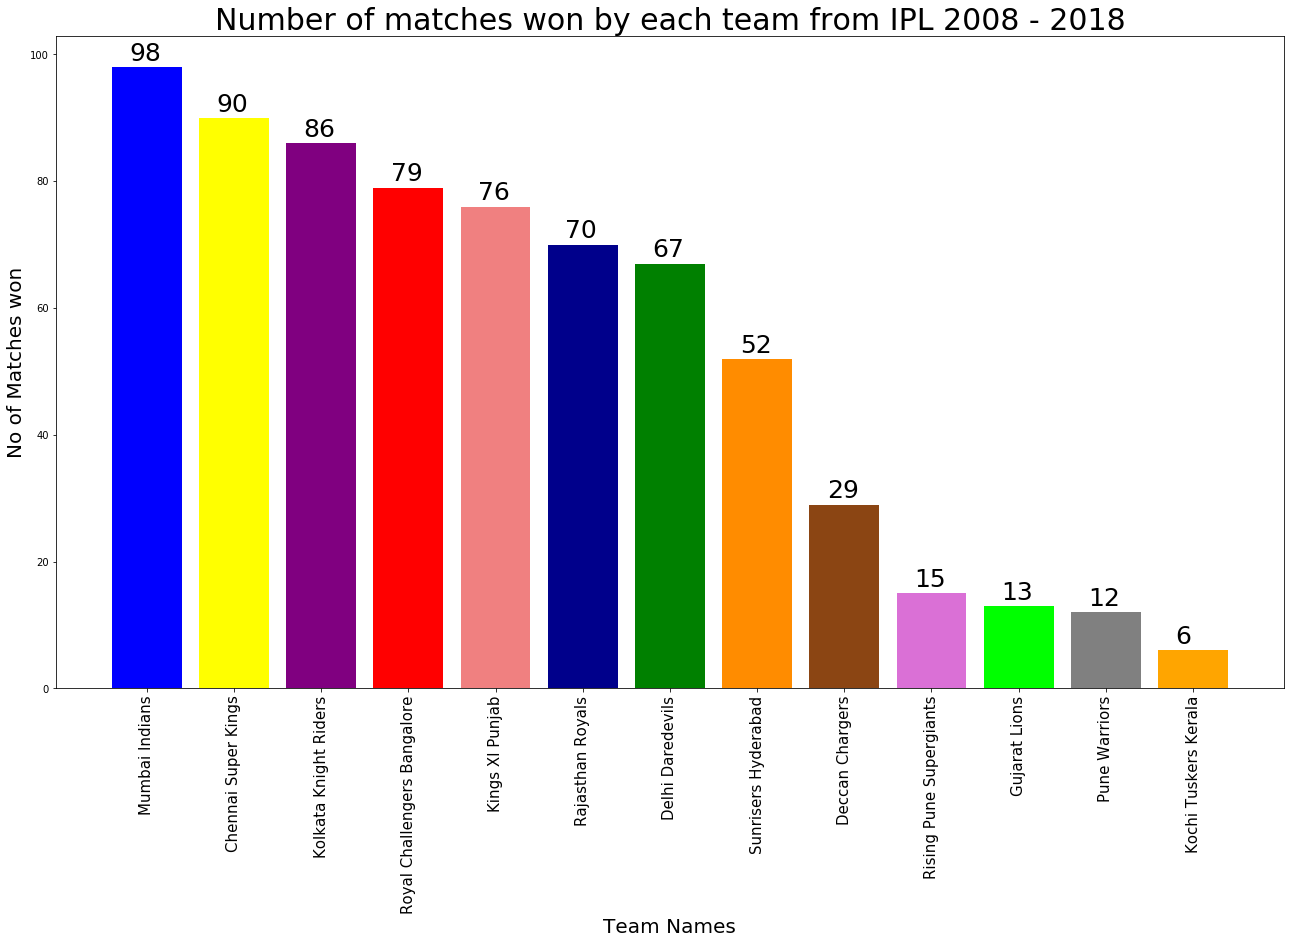

In [16]:
plt.figure(figsize=(22,12))
index = np.arange(len(temp_series.index))
bars=plt.bar(index, no_of_matches, color=['blue', 'yellow', 'purple', 'red', 'lightcoral', 'darkblue', 'green', 'darkorange', 'saddlebrown', 'orchid', 'lime', 'gray', 'orange'])
plt.xlabel('Team Names', fontsize=20)
plt.ylabel('No of Matches won', fontsize=20)
plt.xticks(index, team_names, fontsize=15, rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2, yval +1, yval, fontsize=25)
    
plt.title('Number of matches won by each team from IPL 2008 - 2018', fontsize=30)
plt.show()

<br><h1 align=center><font color=deeppink>Win percentage of each team</font></h1><br>

In [17]:
#Win percentage of each team

perc_name=[]
perc=[]

for i in range(0,13):
    name=temp_series.index[i]
    match=temp_series[i]
    for j in range(0,13):
        if(temp_series2.index[j]==name):
            win=temp_series2[j]
            perc_name.append(name)
            perc.append((win/match)*100)
            
        

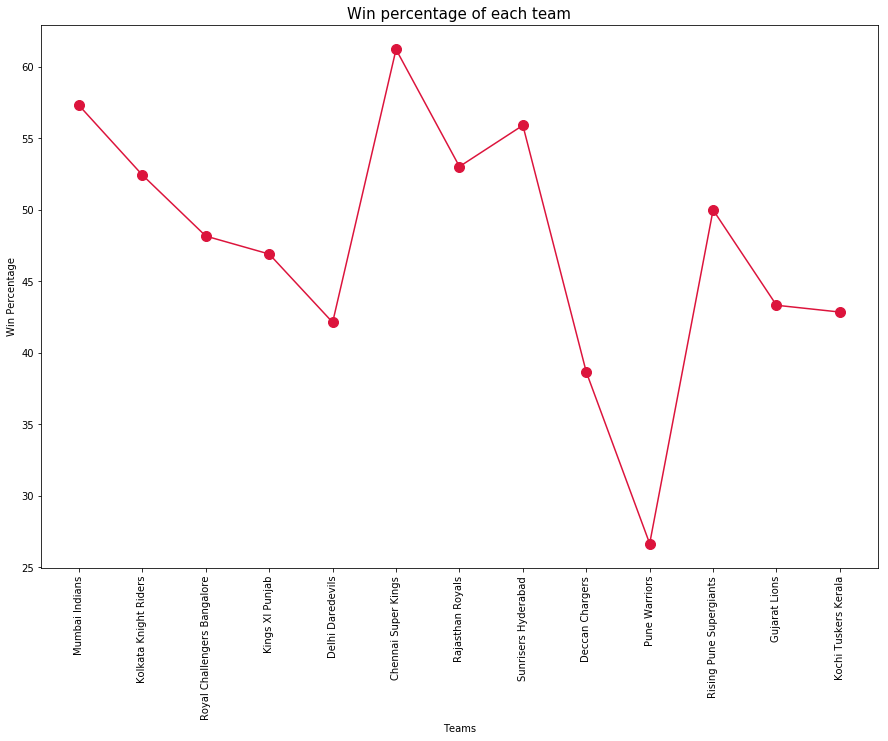

In [18]:
plt.figure(figsize=(15,10))
plt.plot(perc_name, perc, color='crimson', marker='o', markersize=10)
plt.xticks(rotation=90)

plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.title('Win percentage of each team', fontsize=15)
#plt.legend(loc='upper right')
plt.show()

<br><h1 align=center><font color=deeppink>Team that won by most runs</font></h1><br>

In [19]:
#Teams that won by most runs

temp=df[df['win_by_runs']==df['win_by_runs'].max()].reset_index(drop=True)

print("\n"+temp['team1'][0]+ " won by " + str(temp['win_by_runs'][0]) + " against " + temp['team2'][0]+ " in IPL "+ str(temp["season"][0]))


Mumbai Indians won by 146 against Delhi Daredevils in IPL 2017


<br><h1 align=center><font color=deeppink>Team that won by most wickets</font></h1><br>

In [20]:
#Teams that won by most wickets

temp=df[df['win_by_wickets']==df['win_by_wickets'].max()]

temp=temp.sort_values(['season']).reset_index(drop=True)

for i in range(0,temp.shape[0]):
    print(temp['team1'][i]+ " won by " + str(temp['win_by_wickets'][i]) + " against " + temp['team2'][i]+ " in IPL "+ str(temp["season"][i]))
    print("\n")

Mumbai Indians won by 10 against Deccan Chargers in IPL 2008


Kings XI Punjab won by 10 against Delhi Daredevils in IPL 2009


Rajasthan Royals won by 10 against Royal Challengers Bangalore in IPL 2010


Mumbai Indians won by 10 against Rajasthan Royals in IPL 2011


Rajasthan Royals won by 10 against Mumbai Indians in IPL 2012


Kings XI Punjab won by 10 against Chennai Super Kings in IPL 2013


Delhi Daredevils won by 10 against Royal Challengers Bangalore in IPL 2015


Gujarat Lions won by 10 against Sunrisers Hyderabad in IPL 2016


Gujarat Lions won by 10 against Kolkata Knight Riders in IPL 2017


Delhi Daredevils won by 10 against Kings XI Punjab in IPL 2017


Kings XI Punjab won by 10 against Royal Challengers Bangalore in IPL 2018




In [21]:
for i in range(0,df1.shape[0]):
    d=df1.iloc[i]['date']
    if(d[2]=='/' and d[5]=='/'):
        #print(type(datetime.strptime(d, "%d/%m/%y").strftime("%Y-%m-%d")))
        df1.iloc[i, df1.columns.get_loc('date')] = datetime.strptime(d, "%d/%m/%y").strftime("%Y-%m-%d")
        #df1.iloc[i]['date']=datetime.strptime(d, "%d/%m/%y").strftime("%Y-%m-%d")
        #print(df1.iloc[i]['date'])

In [22]:
df2=df1.sort_values(['season','date']).reset_index(drop=True)

In [23]:
kkr=[]
rcb=[]
mi=[]
csk=[]
kxip=[]
dd=[]
dc=[]
srh=[]
rr=[]
rpsg=[]
pwi=[]
gl=[]
ktk=[]

tot_win_count=[]
tot_name=[]
tot_loss_count=[]
c=0
nightmares=[]

In [24]:
for i in range(0,df2.shape[0]):
    if(df2['team1'][i]=="Kolkata Knight Riders" or df2['team2'][i]=="Kolkata Knight Riders"):
        kkr.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Royal Challengers Bangalore" or df2['team2'][i]=="Royal Challengers Bangalore"):
        rcb.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Mumbai Indians" or df2['team2'][i]=="Mumbai Indians"):
        mi.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Chennai Super Kings" or df2['team2'][i]=="Chennai Super Kings"):
        csk.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Kings XI Punjab" or df2['team2'][i]=="Kings XI Punjab"):
        kxip.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Delhi Daredevils" or df2['team2'][i]=="Delhi Daredevils"):
        dd.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Deccan Chargers" or df2['team2'][i]=="Deccan Chargers"):
        dc.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Sunrisers Hyderabad" or df2['team2'][i]=="Sunrisers Hyderabad"):
        srh.append(df2['winner'][i])
    
    if(df2['team1'][i]=="Rajasthan Royals" or df2['team2'][i]=="Rajasthan Royals"):
        rr.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Rising Pune Supergiants" or df2['team2'][i]=="Rising Pune Supergiants"):
        rpsg.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Pune Warriors" or df2['team2'][i]=="Pune Warriors"):
        pwi.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Gujarat Lions" or df2['team2'][i]=="Gujarat Lions"):
        gl.append(df2['winner'][i])
        
    if(df2['team1'][i]=="Kochi Tuskers Kerala" or df2['team2'][i]=="Kochi Tuskers Kerala"):
        ktk.append(df2['winner'][i])
    
        

In [25]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(kkr)-1):
    if(kkr[i]=="Kolkata Knight Riders" and kkr[i+1]=="Kolkata Knight Riders"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(kkr[i]!="Kolkata Knight Riders" and kkr[i+1]!="Kolkata Knight Riders"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Kolkata Knight Riders")

s=""
t1="Kolkata Knight Riders"
x=pd.Series(kkr)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)
pos=[]

for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [26]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(rcb)-1):
    if(rcb[i]=="Royal Challengers Bangalore" and rcb[i+1]=="Royal Challengers Bangalore"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(rcb[i]!="Royal Challengers Bangalore" and rcb[i+1]!="Royal Challengers Bangalore"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Royal Challengers Bangalore")

s=""
t1="Royal Challengers Bangalore"
x=pd.Series(rcb)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [27]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(mi)-1):
    if(mi[i]=="Mumbai Indians" and mi[i+1]=="Mumbai Indians"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(mi[i]!="Mumbai Indians" and mi[i+1]!="Mumbai Indians"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Mumbai Indians")

s=""
t1="Mumbai Indians"
x=pd.Series(mi)
t2=x.value_counts().tolist()

t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)
s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [28]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(csk)-1):
    if(csk[i]=="Chennai Super Kings" and csk[i+1]=="Chennai Super Kings"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(csk[i]!="Chennai Super Kings" and csk[i+1]!="Chennai Super Kings"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Chennai Super Kings")

s=""
t1="Chennai Super Kings"
x=pd.Series(csk)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)
        
s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [29]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(kxip)-1):
    if(kxip[i]=="Kings XI Punjab" and kxip[i+1]=="Kings XI Punjab"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(kxip[i]!="Kings XI Punjab" and kxip[i+1]!="Kings XI Punjab"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Kings XI Punjab")

s=""
t1="Kings XI Punjab"
x=pd.Series(kxip)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)
        
s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [30]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(dd)-1):
    if(dd[i]=="Delhi Daredevils" and dd[i+1]=="Delhi Daredevils"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(dd[i]!="Delhi Daredevils" and dd[i+1]!="Delhi Daredevils"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Delhi Daredevils")

s=""
t1="Delhi Daredevils"
x=pd.Series(dd)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [31]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(dc)-1):
    if(dc[i]=="Deccan Chargers" and dc[i+1]=="Deccan Chargers"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(dc[i]!="Deccan Chargers" and dc[i+1]!="Deccan Chargers"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Deccan Chargers")

s=""
t1="Deccan Chargers"
x=pd.Series(dc)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [32]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(srh)-1):
    if(srh[i]=="Sunrisers Hyderabad" and srh[i+1]=="Sunrisers Hyderabad"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(srh[i]!="Sunrisers Hyderabad" and srh[i+1]!="Sunrisers Hyderabad"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Sunrisers Hyderabad")

s=""
t1="Sunrisers Hyderabad"
x=pd.Series(srh)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [33]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(rr)-1):
    if(rr[i]=="Rajasthan Royals" and rr[i+1]=="Rajasthan Royals"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(rr[i]!="Rajasthan Royals" and rr[i+1]!="Rajasthan Royals"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Rajasthan Royals")

s=""
t1="Rajasthan Royals"
x=pd.Series(rr)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [34]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(rpsg)-1):
    if(rpsg[i]=="Rising Pune Supergiants" and rpsg[i+1]=="Rising Pune Supergiants"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(rpsg[i]!="Rising Pune Supergiants" and rpsg[i+1]!="Rising Pune Supergiants"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Rising Pune Supergiants")

s=""
t1="Rising Pune Supergiants"
x=pd.Series(rpsg)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [35]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(pwi)-1):
    if(pwi[i]=="Pune Warriors" and pwi[i+1]=="Pune Warriors"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(pwi[i]!="Pune Warriors" and pwi[i+1]!="Pune Warriors"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Pune Warriors")

s=""
t1="Pune Warriors"
x=pd.Series(pwi)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [36]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(gl)-1):
    if(gl[i]=="Gujarat Lions" and gl[i+1]=="Gujarat Lions"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(gl[i]!="Gujarat Lions" and gl[i+1]!="Gujarat Lions"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Gujarat Lions")

s=""
t1="Gujarat Lions"
x=pd.Series(gl)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

In [37]:
win_count=1
loss_count=1
maxi_win=-1
maxi_loss=-1

for i in range(0,len(ktk)-1):
    if(ktk[i]=="Kochi Tuskers Kerala" and ktk[i+1]=="Kochi Tuskers Kerala"):
        win_count+=1
    else:
        maxi_win=max(win_count,maxi_win)
        win_count=1
    if(ktk[i]!="Kochi Tuskers Kerala" and ktk[i+1]!="Kochi Tuskers Kerala"):
        loss_count+=1
    else:
        maxi_loss=max(loss_count, maxi_loss)
        loss_count=1
        
tot_win_count.append(maxi_win)
tot_loss_count.append(maxi_loss)
tot_name.append("Kochi Tuskers Kerala")

s=""
t1="Kochi Tuskers Kerala"
x=pd.Series(ktk)
t2=x.value_counts().tolist()
t2.pop(0)
m=max(t2)

pos=[]
for i in range(0,len(t2)):
    if(t2[i]==m):
        pos.append(i)

s+=t1+" has lost against "
for i in range(0,len(pos)):
    s+=x.value_counts().index[pos[i]+1]
    if(i!=len(pos)-1):
        s+=", "

s+=" for a maximum of "+str(m)+" times.\n\n"
#print(s)
nightmares.append(s)

<br><h1 align=center><font color=deeppink>Team with most consecutive wins</font></h1><br>


Kolkata Knight Riders - 10



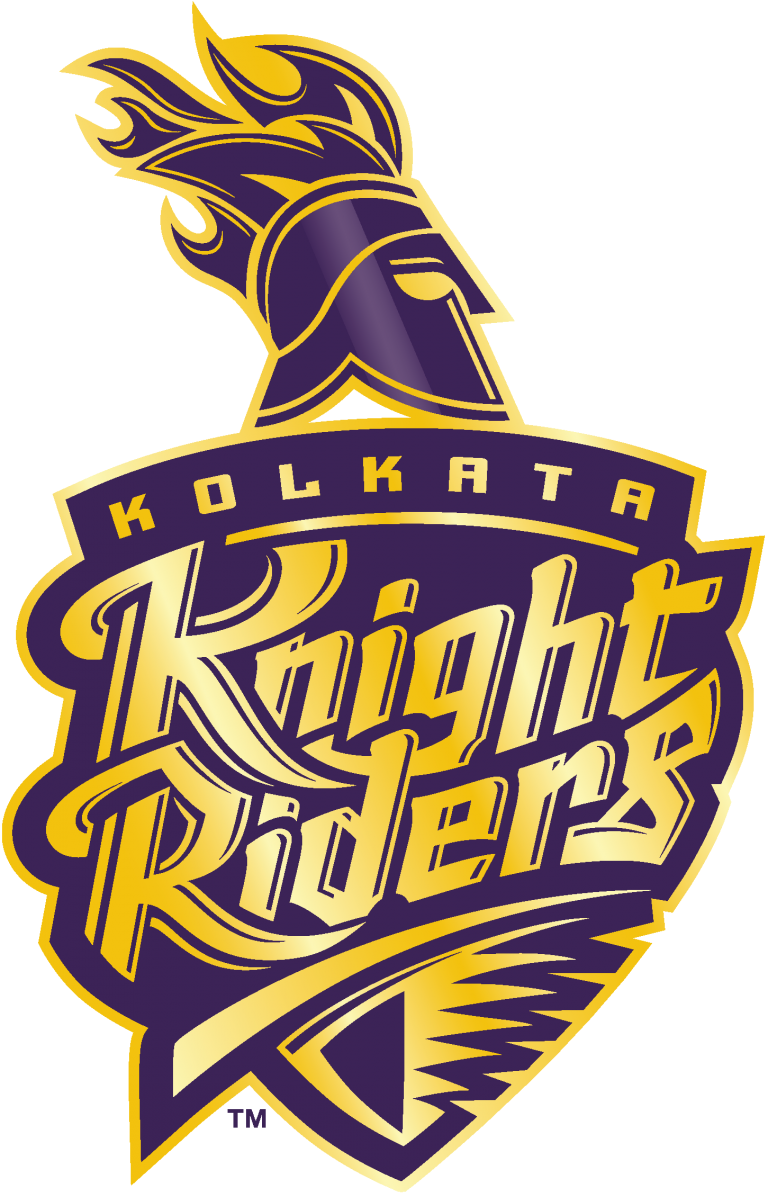

In [38]:
#Team with most consecutive wins

m=max(tot_win_count)
pos=[]
for i in range(0,len(tot_win_count)):
    if(tot_win_count[i]==m):
        pos.append(i)

for i in range(0,len(pos)):
    print("\n"+tot_name[pos[i]]+" - "+str(m)+"\n")
Image("KKR.png", width=200, height=200)

<br><h1 align=center><font color=deeppink>Teams with most consecutive losses</font></h1><br>


Delhi Daredevils - 11


Pune Warriors - 11



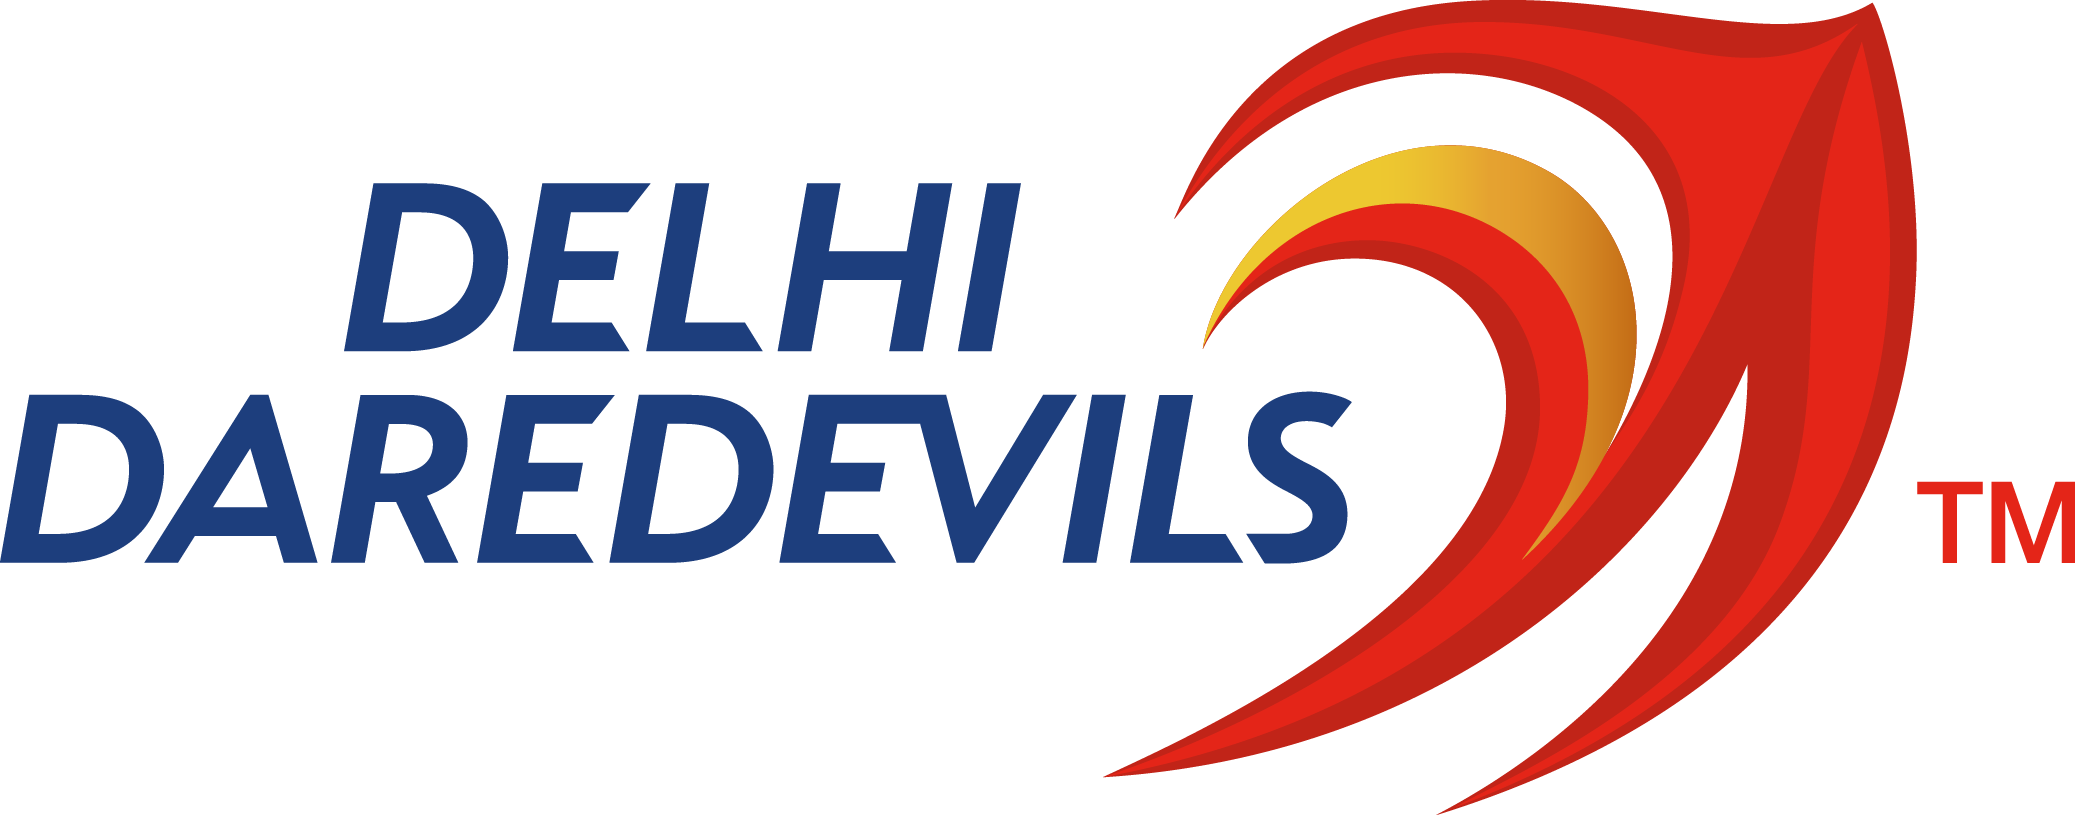

In [39]:
#Teams with most consecutive losses

m=max(tot_loss_count)
pos=[]
for i in range(0,len(tot_loss_count)):
    if(tot_loss_count[i]==m):
        pos.append(i)

for i in range(0,len(pos)):
    print("\n"+tot_name[pos[i]]+" - "+str(m)+"\n")

Image("DD.png", width=400, height=400)

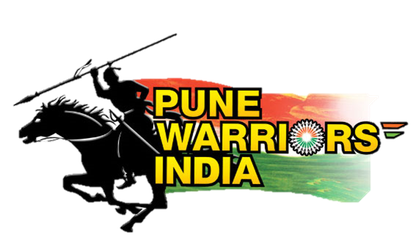

In [40]:
Image("PWI.png", width=400, height=400)

<br><h1 align=center><font color=deeppink>Nightmares for each team</font></h1><br>

In [41]:
#Nightmares for each team

for i in range(0,13):
    print(nightmares[i])

Kolkata Knight Riders has lost against Mumbai Indians for a maximum of 18 times.


Royal Challengers Bangalore has lost against Chennai Super Kings, Mumbai Indians for a maximum of 14 times.


Mumbai Indians has lost against Chennai Super Kings, Delhi Daredevils for a maximum of 11 times.


Chennai Super Kings has lost against Mumbai Indians for a maximum of 13 times.


Kings XI Punjab has lost against Kolkata Knight Riders for a maximum of 15 times.


Delhi Daredevils has lost against Royal Challengers Bangalore for a maximum of 14 times.


Deccan Chargers has lost against Kings XI Punjab, Delhi Daredevils, Rajasthan Royals, Kolkata Knight Riders for a maximum of 7 times.


Sunrisers Hyderabad has lost against Kolkata Knight Riders for a maximum of 9 times.


Rajasthan Royals has lost against Chennai Super Kings for a maximum of 12 times.


Rising Pune Supergiants has lost against Gujarat Lions, Kolkata Knight Riders for a maximum of 3 times.


Pune Warriors has lost against Royal Cha